In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv("train.csv")

In [3]:
test=pd.read_csv("test.csv")

In [4]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
train['Response_flag'] = 1
test['Response_flag'] = 0
test['Response'] = None
print(train.shape, test.shape)

df = pd.concat((train, test))
print(df.shape)

(381109, 13) (127037, 13)
(508146, 13)


In [6]:
df.drop(['id','Vehicle_Age','Previously_Insured','Driving_License'],axis=1,inplace=True)

In [7]:
df.columns

Index(['Gender', 'Age', 'Region_Code', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Response_flag'],
      dtype='object')

In [8]:
df.head()

,Gender,Age,Region_Code,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Response_flag
0,Male,44,28.0,Yes,40454.0,26.0,217,1,1
1,Male,76,3.0,No,33536.0,26.0,183,0,1
2,Male,47,28.0,Yes,38294.0,26.0,27,1,1
3,Male,21,11.0,No,28619.0,152.0,203,0,1
4,Female,29,41.0,No,27496.0,152.0,39,0,1


In [9]:
cat=df.select_dtypes(['object']).columns
cat

Index(['Gender', 'Vehicle_Damage', 'Response'], dtype='object')

In [10]:
cat=cat[:-1]
cat

Index(['Gender', 'Vehicle_Damage'], dtype='object')

In [11]:
df=pd.get_dummies(data=df,columns=['Gender','Vehicle_Damage'],drop_first=True)

In [12]:
df.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Response_flag,Gender_Male,Vehicle_Damage_Yes
0,44,28.0,40454.0,26.0,217,1,1,1,1
1,76,3.0,33536.0,26.0,183,0,1,1,0
2,47,28.0,38294.0,26.0,27,1,1,1,1
3,21,11.0,28619.0,152.0,203,0,1,1,0
4,29,41.0,27496.0,152.0,39,0,1,0,0


In [13]:
df['Region_Code'].unique()

array([28.,  3., 11., 41., 33.,  6., 35., 50., 15., 45.,  8., 36., 30.,
       26., 16., 47., 48., 19., 39., 23., 37.,  5., 17.,  2.,  7., 29.,
       46., 27., 25., 13., 18., 20., 49., 22., 44.,  0.,  9., 31., 12.,
       34., 21., 10., 14., 38., 24., 40., 43., 32.,  4., 51., 42.,  1.,
       52.])

In [18]:
df['Region_Code'].value_counts().sort_values()

51.0       271
52.0       357
42.0       787
44.0      1064
1.0       1363
5.0       1698
40.0      1708
22.0      1729
19.0      2059
34.0      2190
4.0       2379
49.0      2388
20.0      2528
23.0      2596
31.0      2635
38.0      2677
0.0       2699
16.0      2727
24.0      3263
25.0      3352
17.0      3455
26.0      3461
43.0      3508
27.0      3711
32.0      3745
9.0       4084
12.0      4235
7.0       4313
13.0      5396
2.0       5398
21.0      5671
10.0      5847
39.0      6138
14.0      6249
48.0      6274
18.0      6903
37.0      7343
45.0      7543
6.0       8351
35.0      9309
47.0      9942
33.0     10307
36.0     11696
11.0     12328
3.0      12349
50.0     13657
29.0     14843
30.0     16276
15.0     17750
41.0     24400
46.0     26357
8.0      44900
28.0    141937
Name: Region_Code, dtype: int64

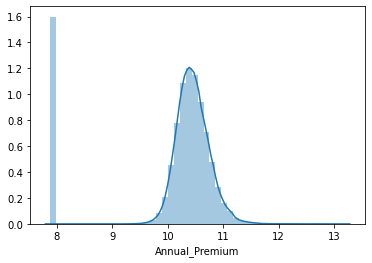

In [19]:
#Data is left Skewed as we can see from above distplot
df['Annual_Premium']=np.log(df['Annual_Premium'])
sns.distplot(df['Annual_Premium'])

In [20]:
train,test = df[df.Response_flag == 1], df[df.Response_flag == 0]


In [21]:
train.drop(['Response_flag'], inplace=True, axis=1)
test.drop(['Response_flag'], inplace=True, axis=1)
test.drop(['Response'], inplace=True, axis=1)

In [22]:
print(train.shape, test.shape)

(381109, 8) (127037, 7)


In [23]:
del df

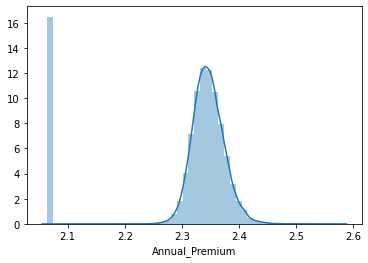

In [24]:
#Data is left Skewed as we can see from above distplot
train['Annual_Premium']=np.log(train['Annual_Premium'])
sns.distplot(train['Annual_Premium'])

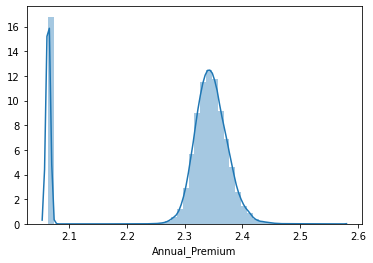

In [25]:
#Data is left Skewed as we can see from above distplot
test['Annual_Premium']=np.log(test['Annual_Premium'])
sns.distplot(test['Annual_Premium'])

In [26]:
train['Response'] = train['Response'].astype(int)


In [27]:
# create x and y train
X = train.drop('Response', axis=1)
y = train[['Response']]

# split data into train and test/validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(304887, 7)
(304887, 1)
(76222, 7)
(76222, 1)


In [28]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

In [29]:
lg=LGBMClassifier(boosting_type='gbdt',n_estimators=500,depth=10,learning_rate=0.04,objective='binary',metric='auc',is_unbalance=True,
                 colsample_bytree=0.5,reg_lambda=2,reg_alpha=2,random_state=294,n_jobs=-1)

lg.fit(X_train,y_train)
print(roc_auc_score(y_test,lg.predict_proba(X_test)[:,1]))

0.8476318991545461


In [30]:
prob = lg.predict_proba(X_test)[:,1]

In [31]:
import lightgbm as lgb


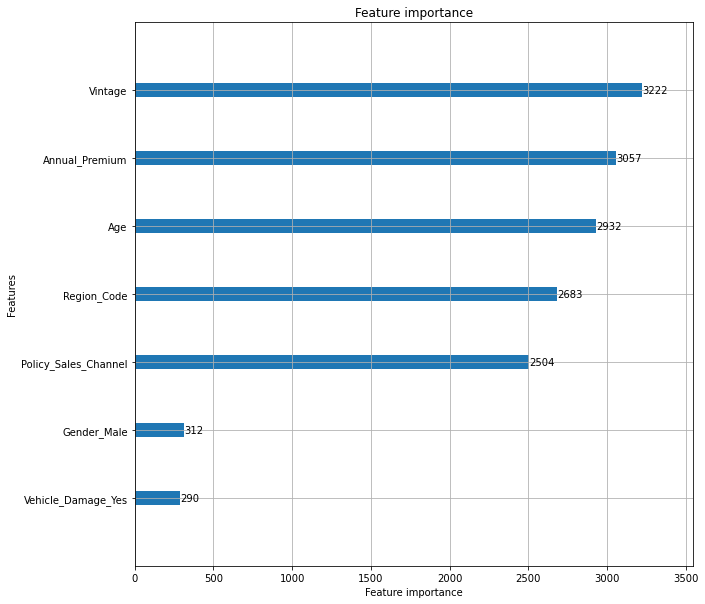

In [32]:
plt.rcParams['figure.figsize'] = (10,10)
lgb.plot_importance(lg)
plt.show()

In [33]:
test['Response']=np.array(lg.predict_proba(test)[:,1])


In [34]:
# Getting the predicted values on the train set
y_train_pred = test['Response']
y_train_pred[:10]

0    0.031933
1    0.769580
2    0.742939
3    0.488268
4    0.010677
5    0.035570
6    0.066582
7    0.029495
8    0.803682
9    0.115645
Name: Response, dtype: float64

In [35]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.03193285, 0.76958045, 0.7429387 , 0.48826823, 0.01067685,
       0.03556994, 0.06658216, 0.02949511, 0.80368189, 0.11564538])

In [36]:
test['Response'] = test.Response.map(lambda x: 1 if x > 0.5 else 0)


In [37]:
test.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Male,Vehicle_Damage_Yes,Response
0,25,11.0,2.349975,152.0,53,1,0,0
1,40,28.0,2.344407,7.0,111,1,1,1
2,47,28.0,2.360654,124.0,199,1,1,1
3,24,27.0,2.354062,152.0,187,1,1,0
4,27,28.0,2.396707,152.0,297,1,0,0


In [38]:
submission = pd.read_csv("test.csv")

In [39]:
submit = pd.DataFrame({'id': submission.id, 'Response': test.Response})


In [40]:
submit.to_csv('submission.csv', index=False)